In [40]:
## Load Libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In 1-D, a random walk is described by an aggregation of the individual steps. The position of a particle in 1-D after N steps can be written down as:
\begin{equation}
\sum_{i=1}^N x_i 
\end{equation}
where $x_i$ is the length of individual step. Now in 1-D we have 2 degrees of freedom, e.g. for the simplest case it can only go in left or in right each with an equal probability => 
\begin{equation}
x_i =\begin{cases}
 -1, & p= \frac{1}{2}\\
 +1, & p= \frac{1}{2} 
\end{cases}
\end{equation}
'1' being the length of each step and 'p' is the probability

In [2]:
N = 1000
x_iter = np.random.choice([-1,1], N)
sum(x_iter)

-22

Following our definition, the position of the particle will be at this position(above).
The poisiton will vary each time the particle starts. Below an example is given with 3 initializations(Each colour represents 1 random walk of the particle in 1D).

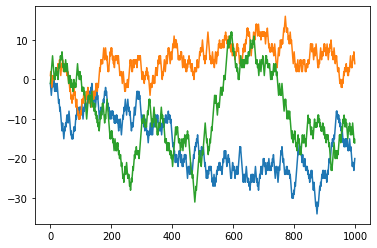

In [3]:
plt.plot(np.cumsum(np.random.choice([-1,1], N)))
plt.plot(np.cumsum(np.random.choice([-1,1], N)))
plt.plot(np.cumsum(np.random.choice([-1,1], N)))

The mean value of all possible random walks is given by:
\begin{equation}
<x>= Nl(2p -1)
\end{equation}
$N$ - Number of steps \\
$l$ - Length of each step \\
$p$ - Probability of moving in +ve direction

The standard deviation is given by:
\begin{equation}
\sigma^2 = 4 N l^2 p(1-p)
\end{equation} 


From what we saw above, we can calculate them manually : \\
$<x> = 10000 * 1 * (2*\frac{1}{2} -1) = 0$ \\
$\sigma^2 = 4*10000*1^2* \frac{1}{2}(1-\frac{1}{2}) = 10000$ 

Lets see if this is what we get : \\
First we simulate N random walks and see if the mean is close to zero. \\
Also, from the formula we see that the deviation scales as a function of N (number of steps). So we also need to see if the deviation increases as N increases.


In [4]:
def random_1D(N):
    ## N is the number of steps ##
    pos_x = sum(np.random.choice([-1,1], N))
    return(pos_x)

## Average over 1000 random walks
random_walks_pos = np.zeros(1000)
for i in range(1000):
  random_walks_pos[i] = random_1D(N)
np.mean(random_walks_pos) ## Mean

-0.784

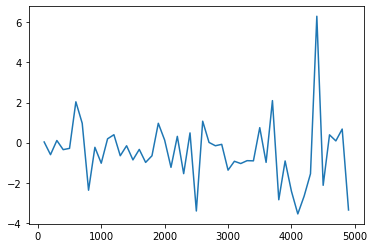

In [5]:
dev = []
#We simulate the position for N ranging from 100 to 5000 in steps of 100
for N in range(100, 5000,100):
  random_walks_pos = np.zeros(1000)
  for i in range(1000):
    random_walks_pos[i] = random_1D(N)
  dev.append(np.mean(random_walks_pos))
plt.plot(range(100, 5000, 100), dev)

Extending the similar model to 2 dimensions, we can have:
\begin{equation}
(x,y)_i =\begin{cases}
(1,1), & p =\frac{1}{4}\\
(-1,1), & p = \frac{1}{4}\\
(1,1), & p = \frac{1}{4}\\
(1,-1), & p =\frac{1}{2}
\end{cases}
\end{equation}

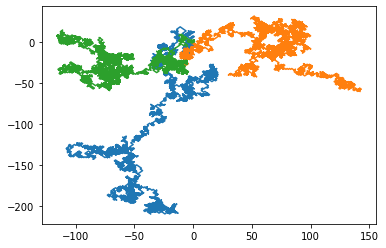

In [6]:
rand_x = np.random.choice([-1,1], N)
rand_y = np.random.choice([-1,1], N)
plt.plot(np.cumsum(rand_x), np.cumsum(rand_y))
rand_x = np.random.choice([-1,1], N)
rand_y = np.random.choice([-1,1], N)
plt.plot(np.cumsum(rand_x), np.cumsum(rand_y))
rand_x = np.random.choice([-1,1], N)
rand_y = np.random.choice([-1,1], N)
plt.plot(np.cumsum(rand_x), np.cumsum(rand_y))

In [67]:
def random_3D(mean = [0,0,0], cov= [[1, 0, 0], [0, 1, 0], [0,0,1]], N = 1000, as_int = False):
  pos_xyz = (np.random.multivariate_normal(mean, cov, N)) ## This uses a continuos distribution for position(to discretize it use as_int =True)
  if (as_int == True):
    pos_xyz = pos_xyz.astype(int)
  print(np.mean(pos_xyz, axis=0))
  fig = plt.figure()
  ax = fig.gca(projection='3d')
  ax.scatter(pos_xyz[:,0],pos_xyz[:,1], pos_xyz[:,2], zdir='z', s=20)

[-0.06401002  0.01266239 -0.02381767]


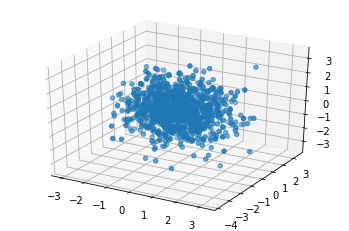

In [68]:
random_3D()